In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

%store -r cat_columns
cat_columns = cat_columns

Descriptive Analysis

Numerical Data

In [3]:
def kde_plot(x):
    plt.figure(figsize=(12, 3))

    sns.distplot(df[x], kde_kws={'lw': 5}, hist_kws={'alpha': 0.25})
    sns.despine(left=True)

    mean = df[x[0]].mean()
    median = df[x[0]].median()

    plt.axvline(mean, color='black', linestyle='dashed')
    plt.axvline(median, color='green', linestyle='solid')

    plt.xlabel('')
    plt.ylabel('')
    
    return plt.show()

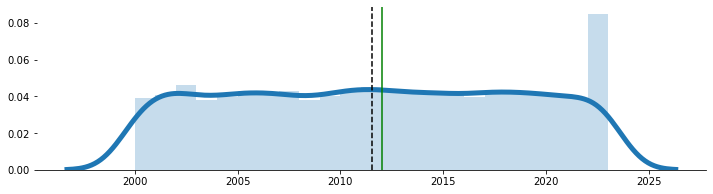

In [4]:
kde_plot([numeric_columns[0]]) #Year

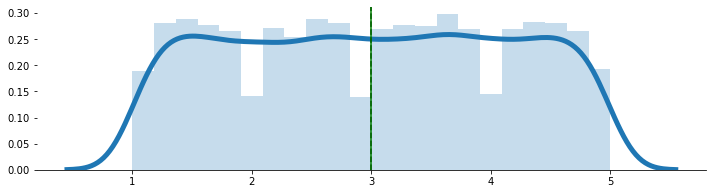

In [5]:
kde_plot([numeric_columns[1]]) #Enginesize

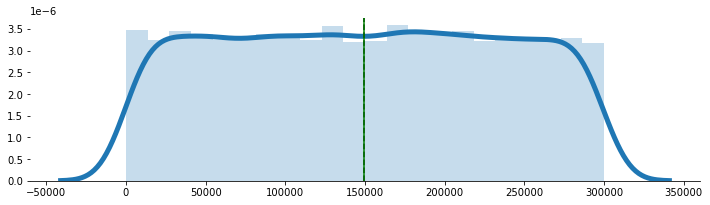

In [6]:
kde_plot([numeric_columns[2]]) #Mileage

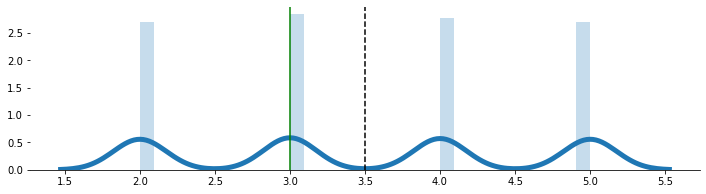

In [7]:
kde_plot([numeric_columns[3]]) #Doors

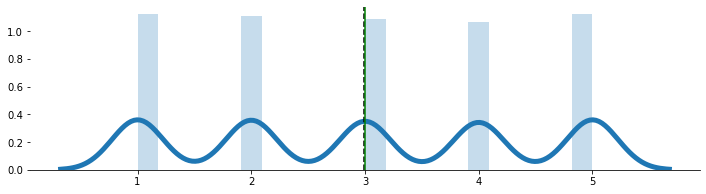

In [8]:
kde_plot([numeric_columns[4]]) #Owners

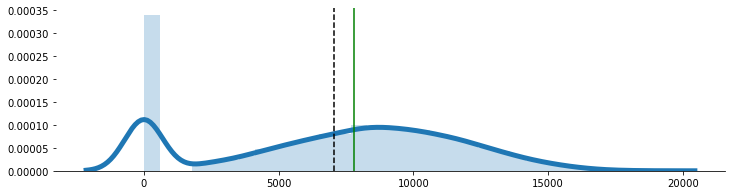

In [9]:
kde_plot([numeric_columns[5]]) #Price

categorical Data

In [10]:
print(cat_columns[0], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[1], '->' , df[cat_columns[1]].mode()[0])
print(cat_columns[2], '->' , df[cat_columns[2]].mode()[0])
print(cat_columns[3], '->' , df[cat_columns[3]].mode()[0])

Brand -> Ford
Model -> Accord
Fuel -> Electric
Transmission -> Manual


Correlation Analysis

Numerical data(Person)

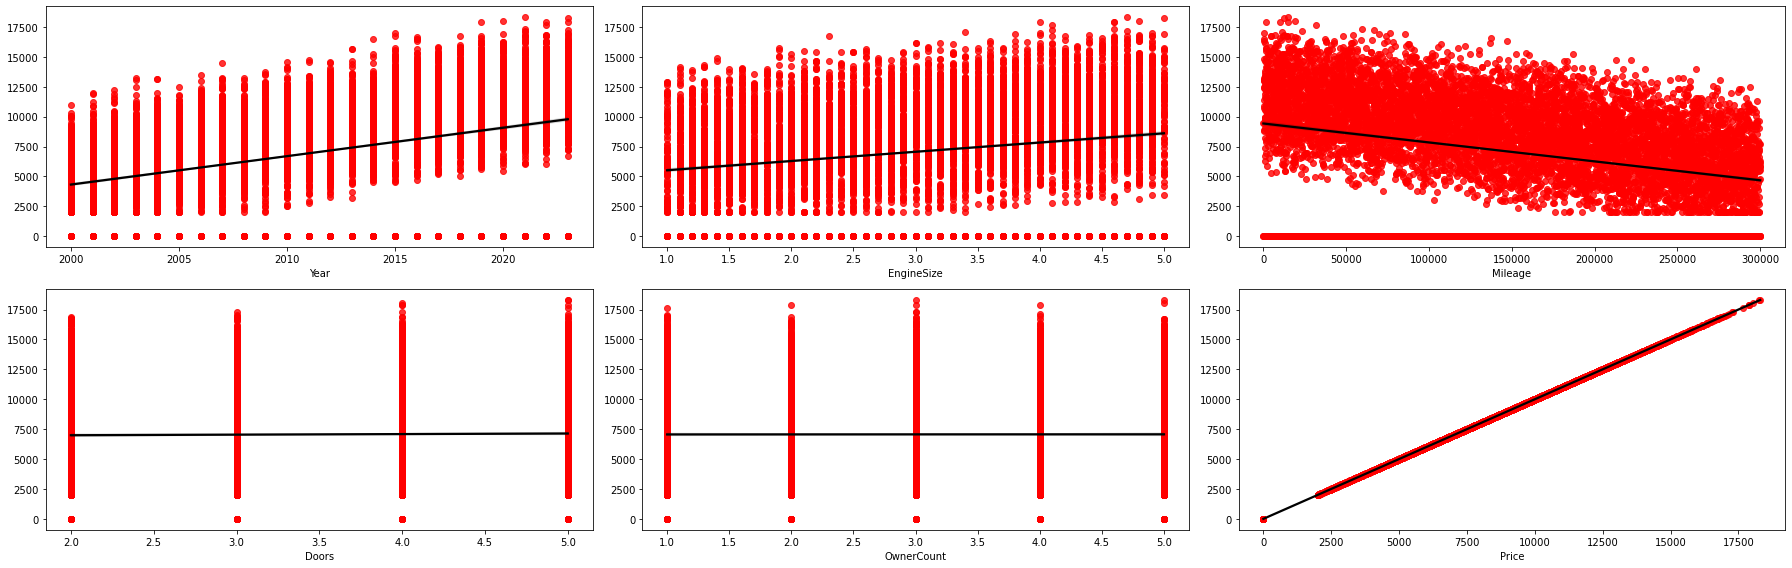

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col,
                y='Price',
                data=df,
                ax=axes[i],
                scatter_kws={'color': 'red'},
                line_kws={'color': 'black'})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

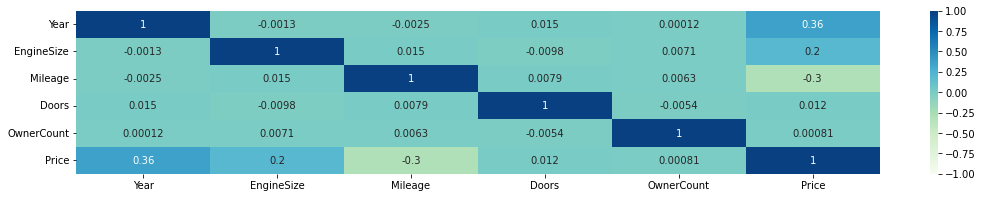

In [12]:
pearson_cor = df[numeric_columns].corr(method='pearson')
plt.figure(figsize=(18, 3))

sns.heatmap(pearson_cor,
            vmin=-1,
            vmax=1,
            cmap='GnBu',
            annot=True)
plt.show()

Categorical Data (ANOVA)

In [13]:
for i in cat_columns:
    formula = 'Price ~ C({})'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, type=2)
    p_value = anova.iloc[0,3]
    print('P-value for Price ~ {}: {}'.format(i, p_value))

P-value for Price ~ Brand: 1.404085549233722
P-value for Price ~ Model: 1.6040550449988928
P-value for Price ~ Fuel: 61.16941037711329
P-value for Price ~ Transmission: 96.68547352397546


In [14]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)
    
    return mean_by.head(5)

In [15]:
mean_pairwise(cat_columns[0])  #Brand

,Price
Brand,
Audi,7322.769750
Volkswagen,7225.621569
Hyundai,7218.396985
Chevrolet,7184.190429
Toyota,7032.073196


In [16]:
mean_pairwise(cat_columns[1])  #Model

,Price
Model,
Tiguan,7613.448864
Sonata,7497.689655
Optima,7388.613095
Fiesta,7384.066116
Q5,7377.242857


In [17]:
mean_pairwise(cat_columns[2])  #Fuel

,Price
Fuel,
Electric,7949.166095
Hybrid,7233.300041
Petrol,6517.314108
Diesel,6494.183519


In [18]:
mean_pairwise(cat_columns[3])  #transmission

,Price
Transmission,
Automatic,7940.903226
Manual,6694.013642
Semi-Automatic,6559.278768
